In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# Loading the initial datasets
mnist = keras.datasets.mnist.load_data()
# dataset object is a tuple that contains two more tuples, in which
# the first tuple has two arrays for the training instances and the
# training labels and the second tuple has the testing instances and
# testing labels

In [3]:
(training_instances, training_labels), (testing_instances, testing_labels) = mnist[0], mnist[1]

In [4]:
# Sanity Check
print(testing_instances.shape)
print(training_instances[0].shape)
print(training_instances[10][10])

(10000, 28, 28)
(28, 28)
[  0   0   0   0   0   0   0   0   0   0   0   0   0  24 209 254 254 254
 171   0   0   0   0   0   0   0   0   0]


In [5]:
# We now need to scale down the values of the training set instances and the testing set instances to make sure
# learning is easier and steadier for the model
training_instances = training_instances / 255
testing_instances = testing_instances / 255
print(training_instances[0][10])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.05490196 0.00392157 0.60392157
 0.99215686 0.35294118 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [6]:
# Separating out the validation set and the training set
x_valid, x_train = training_instances[:5000], training_instances[5000:]
y_valid, y_train = training_labels[:5000], training_labels[5000:]

In [7]:
y_valid[0]

5

In [8]:
# Building the model (the MLP or Neural Network)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(35, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 35)                1785      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                360       
Total params: 41,395
Trainable params: 41,395
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compiling the Model
opt = keras.optimizers.Adam(learning_rate=.003)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=120,validation_data=(x_valid, y_valid))

Epoch 1/120
1719/1719 [==============================] - 2s 868us/step - loss: 0.2635 - accuracy: 0.9206 - val_loss: 0.1513 - val_accuracy: 0.9530
Epoch 2/120
1719/1719 [==============================] - 1s 819us/step - loss: 0.1357 - accuracy: 0.9584 - val_loss: 0.1247 - val_accuracy: 0.9606
Epoch 3/120
  65/1719 [>.............................] - ETA: 1s - loss: 0.1049 - accuracy: 0.9688

KeyboardInterrupt: 

In [79]:
# Getting the accuracy for the test set
test_accuracy = model.evaluate(testing_instances, testing_labels)

313/313 [==============================] - 0s 661us/step - loss: 0.2556 - accuracy: 0.9691


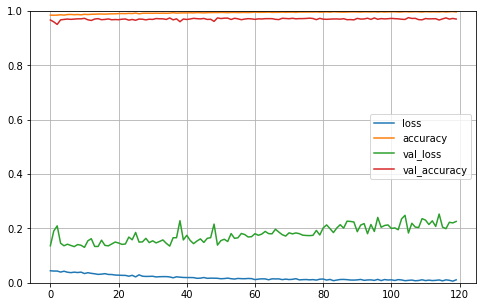

In [81]:
# Plotting the loss
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
# Looks like I started to overfit right off the get-go

In [82]:
# Setting up Tensorboard
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'
# This will allow for the tensorboard to track the current metrics in a time-based file in a specific library

In [84]:
# The Tensorboard callback will then store the data into a file with the time above as the name of the file in
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(x_train, y_train, epochs=30,
validation_data=(x_valid, y_valid),
callbacks=[tensorboard_cb])

Epoch 1/30
1719/1719 [==============================] - 1s 805us/step - loss: 0.0095 - accuracy: 0.9968 - val_loss: 0.2530 - val_accuracy: 0.9690
Epoch 2/30
1719/1719 [==============================] - 1s 808us/step - loss: 0.0081 - accuracy: 0.9970 - val_loss: 0.2157 - val_accuracy: 0.9726
Epoch 3/30
1719/1719 [==============================] - 1s 824us/step - loss: 0.0108 - accuracy: 0.9967 - val_loss: 0.2162 - val_accuracy: 0.9742
Epoch 4/30
1719/1719 [==============================] - 1s 819us/step - loss: 0.0082 - accuracy: 0.9975 - val_loss: 0.2425 - val_accuracy: 0.9698
Epoch 5/30
1719/1719 [==============================] - 1s 803us/step - loss: 0.0064 - accuracy: 0.9979 - val_loss: 0.2446 - val_accuracy: 0.9698
Epoch 6/30
1719/1719 [==============================] - 1s 812us/step - loss: 0.0103 - accuracy: 0.9964 - val_loss: 0.2496 - val_accuracy: 0.9696
Epoch 7/30
1719/1719 [==============================] - 1s 808us/step - loss: 0.0081 - accuracy: 0.9975 - val_loss: 0.2214 -

In [85]:
# This will then open tensorboard in a webpage for you
#--logdir=./'Chapter 11 Exercises
#'/my_logs --port=6006

In [108]:
# Making the build model for the scikit learn wrapper in Keras
def build_model(n_hidden=3, n_neurons=30, learning_rate=3e-3,input_shape=[28,28]):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(10))
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer, metrics=["accuracy"])
    return model
keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [110]:
# Do not know what is going on here, but this training process below will give you almost random loss curves
keras_clf.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])
sparse_categorical_test = keras_clf.score(testing_instances, testing_labels)

Epoch 1/100
1719/1719 [==============================] - 1s 760us/step - loss: 4.3266 - accuracy: 0.0626 - val_loss: 2.9467 - val_accuracy: 0.1548
Epoch 2/100
1719/1719 [==============================] - 1s 713us/step - loss: 2.5157 - accuracy: 0.1128 - val_loss: 2.0600 - val_accuracy: 0.0956
Epoch 3/100
1719/1719 [==============================] - 1s 734us/step - loss: 1.9571 - accuracy: 0.0955 - val_loss: 1.6590 - val_accuracy: 0.0918
Epoch 4/100
1719/1719 [==============================] - 1s 731us/step - loss: 1.7568 - accuracy: 0.0851 - val_loss: 1.8102 - val_accuracy: 0.0948
Epoch 5/100
1719/1719 [==============================] - 1s 714us/step - loss: 1.6354 - accuracy: 0.0803 - val_loss: 1.5002 - val_accuracy: 0.0826
Epoch 6/100
1719/1719 [==============================] - 1s 741us/step - loss: 1.5435 - accuracy: 0.0732 - val_loss: 1.3309 - val_accuracy: 0.0796
Epoch 7/100
1719/1719 [==============================] - 1s 731us/step - loss: 1.4431 - accuracy: 0.0643 - val_loss: 1